In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
print(os.getcwd())

/Users/kooskoets/Documents/ITVitae/Git archief voor voltooide opdrachten/DataScience_Project_1/Notebook


In [3]:
# importing data
GDP_df = pd.read_csv('../CSV/API_NY.GDP.PCAP.KD_DS2_en_csv_v2.csv', skiprows=4)
CO2_df = pd.read_excel('../CSV/indicator_CDIAC_carbon_dioxide_total_emissions.xlsx')
REN_df = pd.read_csv('../CSV/API_EG.FEC.RNEW.ZS_DS2_en_csv_v2.csv', skiprows=4)

In [4]:
# Remove Columns from dataframe GDP_df and REN_df. First make a list of column names to be removed
list1 = GDP_df.columns.values.tolist()
del_cols = list1[1:34]
del_cols.extend(list1[-7:-1])
print(del_cols)

['Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '2012', '2013', '2014', '2015', '2016', '2017']


In [5]:
#Use .drop() to remove columns contained in list
GDP_df = GDP_df.drop(del_cols, axis=1)
REN_df = REN_df.drop(del_cols, axis=1)

In [6]:
#Dropping the last column
GDP_df = GDP_df.drop(GDP_df.columns[-1],axis=1)
REN_df = REN_df.drop(REN_df.columns[-1],axis=1)

In [7]:
#For the CO2 dataset also make a column list to drop columns
list2 = CO2_df.columns.values.tolist()
list2.index(1989)

224

In [8]:
drop_cols = list2[1:225]
CO2_df = CO2_df.drop(drop_cols, axis=1)
CO2_df.head()

CO2 emission total          1990          1991          1992     1993  \
0               Abkhazia           NaN           NaN           NaN      NaN   
1            Afghanistan   2676.666667   2493.333333   1426.333333   1375.0   
2  Akrotiri and Dhekelia           NaN           NaN           NaN      NaN   
3                Albania   7487.333333   3971.000000   2387.000000   2343.0   
4                Algeria  78888.333330  81451.333330  82254.333330  82467.0   

           1994          1995          1996          1997           1998  \
0           NaN           NaN           NaN           NaN            NaN   
1   1320.000000   1268.666667   1199.000000   1114.666667    1056.000000   
2           NaN           NaN           NaN           NaN            NaN   
3   1928.666667   2086.333333   2016.666667   1543.666667    1752.666667   
4  86342.666670  94684.333330  96558.000000  88187.000000  107070.333300   

      ...               2002         2003          2004           2005  \
0     ...                NaN          NaN           NaN            NaN   
1     ...         359.333333    583.00000    733.333333     997.333333   
2     ...                NaN          NaN           NaN            NaN   
3     ...        3747.333333   4290.00000   4114.000000    4601.666667   
4     ...       90845.333330  92524.66667  89485.000000  107118.000000   

            2006           2007           2008           2009         2010  \
0            NaN            NaN            NaN            NaN          NaN   
1    1272.333333    1888.333333    3776.666667    6314.000000          NaN   
2            NaN            NaN            NaN            NaN          NaN   
3    4238.666667    4491.666667    4128.666667    3006.666667          NaN   
4  107294.000000  112731.666700  111294.333300  121300.666700  118016.6954   

          2011  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4  124298.0933  

[5 rows x 23 columns]

In [9]:
# Change to column name of the columns containing the countries to 'Country'
CO2_df = CO2_df.rename(columns={'CO2 emission total' : 'Country'})
REN_df = REN_df.rename(columns={'Country Name' : 'Country'})
GDP_df = GDP_df.rename(columns={'Country Name' : 'Country'})

In [10]:
#Selecting 30 rows with highest value in 2011, using CO2_df
CO2_df = CO2_df.sort_values(2011, ascending=False).head(30)

In [11]:
#Select the same countries from the other dataframes
countries_df = CO2_df['Country']
countries_df = countries_df.to_frame()

In [12]:
REN_df = pd.merge(countries_df, REN_df, how='left', on='Country')
GDP_df = pd.merge(countries_df, GDP_df, how='left', on='Country')

In [13]:
# Reindex the dataframe
CO2_df.index = range(0, len(CO2_df))

In [14]:
#Writing the DataFrames to CSV
REN_df.to_csv('../CSV/REN_df.csv')
GDP_df.to_csv('../CSV/GDP_df.csv')
CO2_df.to_csv('../CSV/CO2_df.csv')

In [15]:
#Creating melted DataFrames. First create list with all the years.
Years1 = [x + 1990 for x in range(22)]
print(Years1)
Years2 = [str(i) for i in Years1]

[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]


In [16]:
CO2_LONG_df = pd.melt(CO2_df, id_vars=['Country'], value_vars=Years1, var_name='Year', value_name='CO2 in kton')
GDP_LONG_df = pd.melt(GDP_df, id_vars=['Country'], value_vars=Years2, var_name='Year', value_name='GDP per capita')
REN_LONG_df = pd.melt(REN_df, id_vars=['Country'], value_vars=Years2, var_name='Year', value_name='% Renewables')

In [17]:
REN_LONG_df.head()

Country  Year  % Renewables
0          China  1990     34.083613
1  United States  1990      4.175463
2          India  1990     58.652863
3         Russia  1990           NaN
4          Japan  1990      4.550664

In [18]:
new_df = pd.merge(REN_LONG_df, GDP_LONG_df,  how='left', left_on=['Country','Year'], right_on = ['Country','Year'])
new_df.head()

Country  Year  % Renewables  GDP per capita
0          China  1990     34.083613      730.772489
1  United States  1990      4.175463    36312.414183
2          India  1990     58.652863      536.162786
3         Russia  1990           NaN             NaN
4          Japan  1990      4.550664    37906.163702

In [19]:
long_df = new_df.join(CO2_LONG_df, how='left', lsuffix='', rsuffix='_')
long_df

Country  Year  % Renewables  GDP per capita        Country_ Year_  \
0             China  1990     34.083613      730.772489           China  1990   
1     United States  1990      4.175463    36312.414183   United States  1990   
2             India  1990     58.652863      536.162786           India  1990   
3            Russia  1990           NaN             NaN          Russia  1990   
4             Japan  1990      4.550664    37906.163702           Japan  1990   
5           Germany  1990      2.098034    32337.101023         Germany  1990   
6              Iran  1990           NaN             NaN            Iran  1990   
7       South Korea  1990           NaN             NaN     South Korea  1990   
8            Canada  1990     22.020750    36489.266354          Canada  1990   
9      South Africa  1990     16.627820     5934.224116    South Africa  1990   
10        Indonesia  1990     58.597546     1707.597918       Indonesia  1990   
11     Saudi Arabia  1990      0.037985    18002.738727    Saudi Arabia  1990   
12           Mexico  1990     14.413301     7257.931082          Mexico  1990   
13   United Kingdom  1990      0.651134    28691.292875  United Kingdom  1990   
14           Brazil  1990     49.864678     7986.045873          Brazil  1990   
15            Italy  1990      3.781464    30839.278333           Italy  1990   
16        Australia  1990      8.009579    35827.096720       Australia  1990   
17           France  1990     10.408020    32596.005188          France  1990   
18           Poland  1990      2.501485     5946.670850          Poland  1990   
19          Ukraine  1990      0.650123     3965.382723         Ukraine  1990   
20           Turkey  1990     24.574920     6774.406750          Turkey  1990   
21            Spain  1990     10.544432    22464.732915           Spain  1990   
22         Thailand  1990     33.639130     2502.712718        Thailand  1990   
23           Taiwan  1990           NaN             NaN          Taiwan  1990   
24       Kazakhstan  1990      1.407717     5890.276043      Kazakhstan  1990   
25            Egypt  1990           NaN             NaN           Egypt  1990   
26         Malaysia  1990     11.980543     4534.795168        Malaysia  1990   
27        Venezuela  1990           NaN             NaN       Venezuela  1990   
28        Argentina  1990      8.922904     5939.756916       Argentina  1990   
29      Netherlands  1990      1.324057    35483.299496     Netherlands  1990   
..              ...   ...           ...             ...             ...   ...   
630           China  2011     16.386591     4971.544929           China  2011   
631   United States  2011      8.164451    48783.468587   United States  2011   
632           India  2011     38.934753     1416.403391           India  2011   
633          Russia  2011           NaN             NaN          Russia  2011   
634           Japan  2011      4.695860    44538.708086           Japan  2011   
635         Germany  2011     11.394356    44125.331412         Germany  2011   
636            Iran  2011           NaN             NaN            Iran  2011   
637     South Korea  2011           NaN             NaN     South Korea  2011   
638          Canada  2011     22.651741    48456.964574          Canada  2011   
639    South Africa  2011     16.864874     7416.716185    South Africa  2011   
640       Indonesia  2011     38.954145     3262.748613       Indonesia  2011   
641    Saudi Arabia  2011      0.006841    20575.497951    Saudi Arabia  2011   
642          Mexico  2011      9.066177     9183.328078          Mexico  2011   
643  United Kingdom  2011      4.484567    39150.756019  United Kingdom  2011   
644          Brazil  2011     45.468545    11559.212271          Brazil  2011   
645           Italy  2011     11.904941    35994.133582           Italy  2011   
646       Australia  2011      8.472198    52372.154538       Australia  2011   
647          France  2011     10.839570    

In [20]:
long_df = long_df.drop(['Country_', 'Year_'], axis=1)
long_df.head()

Country  Year  % Renewables  GDP per capita  CO2 in kton
0          China  1990     34.083613      730.772489  2460520.333
1  United States  1990      4.175463    36312.414183  4878932.667
2          India  1990     58.652863      536.162786   690514.000
3         Russia  1990           NaN             NaN          NaN
4          Japan  1990      4.550664    37906.163702  1094533.000

In [21]:
long_df.to_csv('../CSV/long_df.csv')

# Begin bijdrage Kees

## Top-10 climbers and reducers

As a very first observation, I noted that the emission data of 2010 and 2011 were very incomplete. In fact, only about fifty countries had values for them. However, I reasoned that, on a global scale, the top-30 pollutants would contribute the vast share of the emissions. I did not check this quantitatively, though. 

By comparing with the 2009-data, I found that there were no countries in the emission top030 of 2009 that had no data in 2011. In fact the first one missing was no 37, which was Iraq. A plausible explanation for this is that the countries absent from 2011 tend to take longer to provide their statistics, as they are developing countries. Therefore, they also tend to be smaller emitters. So, I decided it would safe to limit the analysis to the top-30 biggest emitters in 2011. I provided a list of these countries, which served as the starting point for Jan Schoonbrood's data manipulation, as described in the cells above.

The first graph shows the top-10 climbers in the ten-year range from 2001-2011. The time period of ten was chosen, because it was the period during which there was an important increase in the awareness of the problem of global warning.

From the CO2 emisison data, I calculated the absolute increase over 2001-2011 and the percentual increase. I plotted the 2011 emission data as bars, made up of the 2001 emission and the increase over 2001-2011, and sorted them by percentual increase of emission. To make this clear, I added the percent figure next to each bar, based on Youri's plot of average working week hours in the EU.

The top of the list is proudly held by China, which is not too surprising.

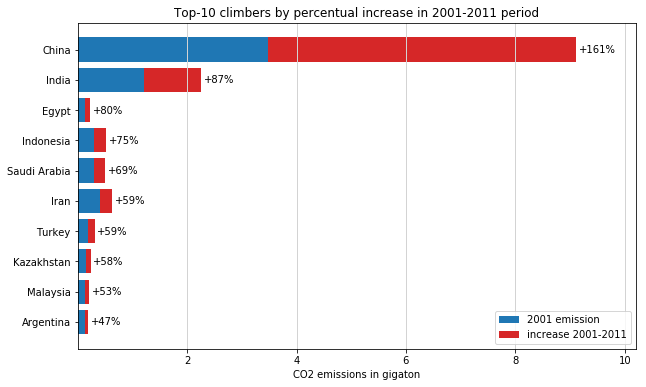

In [23]:
#%matplotlib inline

#read the data from disk
df_top30_2011 = pd.read_csv("../csv/CO2_df.csv")

#add a column with the percentual change
df_top30_2011['perc. change'] = 100*(df_top30_2011['2011'] - df_top30_2011['2001'])/df_top30_2011['2001']

#add a column with the net increase between 2001 and 2011
df_top30_2011['increase'] = df_top30_2011['2011'] - df_top30_2011['2001']

#Create a new dataframe to pick the top-10 sorted by percentual increase 
df_top10_inc = df_top30_2011.sort_values('perc. change', ascending = False).head(10)

#Reverse the sort order, so as to obtain the desired chart, with the biggest polluter on top.
df_top10_inc = df_top10_inc.sort_values('perc. change')

#Obtain the appropriate data as lists from the dataframe
#First the list of countries
lstCountries = df_top10_inc['Country'].values.tolist()
#The other lists  
lstEmissions2001 = [w/1000000 for w in df_top10_inc['2001'].values.tolist()]
lstIncrease = [w/1000000 for w in df_top10_inc['increase'].values.tolist()]
lstPercChange= df_top10_inc['perc. change'].values.tolist()

#Create an array of the appropriate length
ind = np.arange(df_top10_inc.shape[0])

fig, ax1 = plt.subplots(1, 1, figsize=(10,6))
p1 = plt.barh(ind, lstEmissions2001)
p2 = plt.barh(ind, lstIncrease, left=lstEmissions2001, color='#d62728')

rects = p2.patches

ax1.set_xlim(0,10.2)
ax1.set_xticks([2, 4, 6, 8, 10])
ax1.xaxis.grid(color='lightgray', linestyle='-', linewidth=1)
plt.title('Top-10 climbers by percentual increase in 2001-2011 period')
plt.xlabel('CO2 emissions in gigaton')

plt.yticks(ind, lstCountries)

#Bar labels
i=0
for rect in rects: 
    y_value = rect.get_y() + rect.get_height() / 2
    x_value = rect.get_x() + rect.get_width()
    label = '+' + str(int(lstPercChange[i])) + '%'
    ax1.annotate(label, (x_value, y_value), ha='left', xytext=(x_value+0.05, y_value-0.1))
    i=i+1

plt.legend((p1[0], p2[0]), ('2001 emission', 'increase 2001-2011'))

plt.show()

Next, I observed that from the top-10 countries with the least percentual increase over 2001-2011, eight had actually been capable of reducing their emissions, but two had not. Therefore, I could not use the technique of the previous plot, because that would mean plotting a negative surface for the two net increasers. I therefore decided to just plot the absolute decrease or increase in gigaton, and to once more list the countries by percentual decrease, see below. 

The net increasers, among which our own country, have their absolute increase plotted in red.

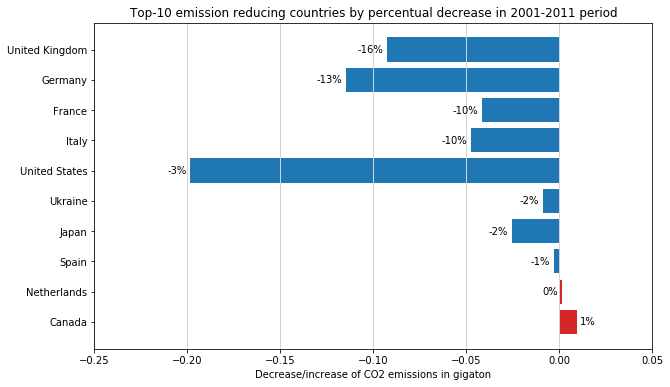

In [36]:
#Create a scratch dataframe to pick the top-10 decreasers, sorted by percentual decrease 
df_top10_dec = df_top30_2011.sort_values('perc. change').head(10)

#Reverse the sort order, so as to obtain the desired chart, with the biggest polluter on top.
df_top10_dec = df_top10_dec.sort_values('perc. change', ascending=False)

#Obtain the appropriate data as lists from the dataframe
#First the list of countries
lstCountries = df_top10_dec['Country'].values.tolist()
#The other lists  
lstEmissions2001 = [w/1000000 for w in df_top10_dec['2001'].values.tolist()]
lstIncrease = [w/1000000 for w in df_top10_dec['increase'].values.tolist()]
lstPercChange = df_top10_dec['perc. change'].values.tolist()

#Create an array of the appropriate length
ind = np.arange(df_top10_dec.shape[0])

fig, ax1 = plt.subplots(1, 1, figsize=(10,6))
p1 = plt.barh(ind, lstIncrease)

rects = p1.patches

#Bar labels
i=0
for rect in rects: 
    y_value = rect.get_y() + rect.get_height() / 2
    x_value = rect.get_width() #rect.get_x() #- 
    label = str(int(lstPercChange[i])) + '%'
    #The bottom bar requires special positioning. In MatPlotLb, this is patch[0]
    if i>0:
        ax1.annotate(label, (x_value, y_value), ha='right', xytext=(x_value-0.002, y_value-0.1))
    else: 
        ax1.annotate(label, (x_value, y_value), ha='right', xytext=(x_value+0.01, y_value-0.1))
    #Likewise, the two bottom bars can be given a different color    
    if i<=1:
            rect.set_facecolor('#d62728')
    i=i+1

ax1.set_xlim(-0.25,0.05)
#ax1.set_xticks([2, 4, 6, 8, 10])
ax1.xaxis.grid(color='lightgray', linestyle='-', linewidth=1)
plt.title('Top-10 emission reducing countries by percentual decrease in 2001-2011 period')
plt.xlabel('Decrease/increase of CO2 emissions in gigaton')

plt.yticks(ind, lstCountries)

plt.show()

An obvious question is whether the top-10 emission reducing countries managed to the compensate for the reduced amount of fossil fuels that they burned, by increasing their consumption of renewable energy. Also, what looks striking is that, with the exception of the Ukraine, all these countries seem to be from the developed world. 

To investigate further, I combined the data about CO2 emissions with those about renewable energy consumption.  Furthermore, I classified the capita GDP per year in five categories, viz. 0-12,5000 USD/year, 12,5000-25,000 uSD/year and so on, up to over 50,000 USD/year. I linked these data to the combined emission-renewable data. I then drew a scatter plot of the percentual change in CO2 emission versus the change in percentage of the share of renewable energy, using the GDP-classification to color the dots, see chart below the code:  

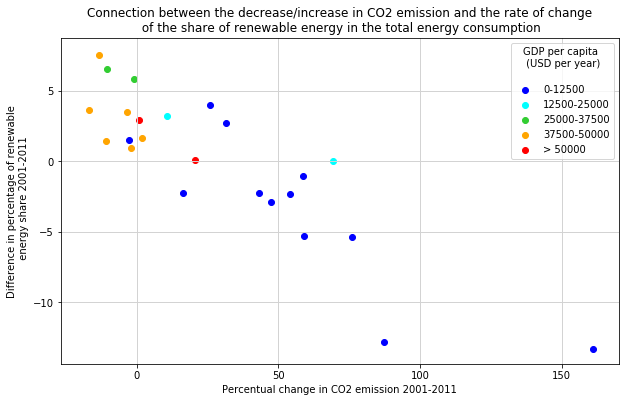

In [24]:
import math
import numpy as np

#A quick function to categorize GDP
def fn_gdp_cls(gdp):
    return math.floor(float(gdp)/12500)

#Picks the values for the dataframe rows with only this GDP-class
def get_data_for_this_gdp_class(gdp_cl):
    #Create a query string
    qu = 'gdp_class == ' + str(gdp_cl)
    res = df_Corr.query(qu)[['perc_ch_emsn', 'delta_renew']].values.tolist()
    #transpose the result
    return np.array(res).T.tolist()

#read the data from disk
df_CO2_corr = pd.read_csv("../csv/CO2_df.csv")
df_REN_corr = pd.read_csv("../csv/REN_df.csv")
df_GDP_corr = pd.read_csv("../csv/GDP_df.csv")

#Remove countries for which no data about renewable energy exist for 2011
df_REN_corr.dropna(subset=['2011'], inplace=True)
#Same for GDP
df_GDP_corr.dropna(subset=['2011'], inplace=True)

#To the CO2 dataframe, add a column with the percentual change from years 2001 to 2011
df_CO2_corr['perc_ch_emsn'] = 100*(df_CO2_corr['2011'] - df_CO2_corr['2001'])/df_CO2_corr['2001']

#To the renewable energy dataframe, add a column with the percentual change in the percentual
#share of renewable energy, also for 2001 and 2011
df_REN_corr['delta_renew'] = df_REN_corr['2011'] - df_REN_corr['2001']

#To the GDP dataframe, add a column that groups the GDP over 2011 by effectively performing an integer divide operation
#First, rename the year column, to avoid pesky problems with data types
df_GDP_corr = df_GDP_corr.rename(columns={'2011': 'Y2011'})
df_GDP_corr['gdp_class'] = df_GDP_corr.apply(lambda row: fn_gdp_cls(row.Y2011), axis=1)

#Remove all columns, except the countries and the columns we've just added
df_CO2_corr = df_CO2_corr[['Country', 'perc_ch_emsn']]
df_REN_corr = df_REN_corr[['Country', 'delta_renew']]
df_GDP_corr = df_GDP_corr[['Country', 'gdp_class']]

#In SQL parlance, join the three dataframes on country and sort by increase in CO2 emission
df_Corr = pd.merge(df_CO2_corr, df_REN_corr, on='Country')
df_Corr = pd.merge(df_Corr, df_GDP_corr, on='Country').sort_values('perc_ch_emsn', ascending = False)

lstGDPClass = df_Corr['gdp_class'].values.tolist()
setGDPClass =set(lstGDPClass)

data_per_class = [get_data_for_this_gdp_class(x) for x in setGDPClass]

colors = ['blue', 'aqua', 'limegreen', 'orange', 'red']
labels = ['0-12500', '12500-25000', '25000-37500', '37500-50000', '> 50000']

fig, ax = plt.subplots(1,1, figsize=(10,6))

pl = []
for i in setGDPClass:
    pl.append(plt.scatter(data_per_class[i][0], data_per_class[i][1], color=colors[i]))

plt.legend(pl, labels, scatterpoints=1, title='GDP per capita \n (USD per year)\n', loc='upper right')    
ax.set_title('Connection between the decrease/increase in CO2 emission and the rate of change\n of the share of renewable energy in the total energy consumption')

ax.set_xticks([0, 50, 100, 150])
ax.xaxis.grid(color='lightgray', linestyle='-', linewidth=1)

ax.set_yticks([5, 0, -5, -10])
ax.yaxis.grid(color='lightgray', linestyle='-', linewidth=1)
ax.xaxis.grid(color='lightgray', linestyle='-', linewidth=1)

plt.xlabel('Percentual change in CO2 emission 2001-2011')
plt.ylabel('Difference in percentage of renewable\n  energy share 2001-2011')

for i in setGDPClass:
    plt.show()



A few conclusions seem to be apparent from the chart:

First, the sought-after correlation indeed seems to be there. Countries that managed to decrease their emissions, tend to have increased the percentage of energy consumption provided by renewable energy and vice versa. So, these countries seem to compensate for the decrease in fossil fuel burning by increasing energy use from renewable sources.

Also, the top-left corner of the chart is predominantly populated by orange and green dots. So, the countries that have successfully implemented the above mentioned change, tend to be from the mid to high GDP-classes. The converse is also true: in the lower-right corner are only blue dots, indicating the lowest GDP-class.  

One of the red dots seems to be further right-down than one would expect. This country is Australia, which has been notoriously careless when it comes to green issues. Incidentally, the other red dot represents the Netherlands, which does not seem to make much headway either in the energy transition.